In [1]:
import os
import cv2
import random
import shutil
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from keras.applications import MobileNetV2

In [2]:
train_dir = 'images/train'
testing_dir = 'images/testing'

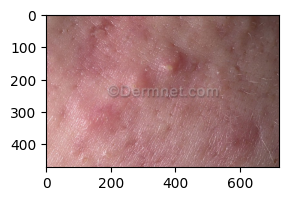

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

image = imread("images/train/acne/07AcnePittedScars.jpg")
plt.figure(figsize=(3, 3))
plt.imshow(image)


In [4]:
import skimage.io as skio
from skimage.transform import resize

IMAGE_SIZE =224
BATCH_SIZE = 128
base_dir = os.path.join('images/train')

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    subset='validation')

X_testing = []
y_testing = []
labels = ['Acne', 'Actinic Keratosis', 'Basal Cell Carcinoma', 'Eczemaa', 'Rosacea']

for i,label in enumerate(labels):
    folder = os.path.join("images/testing",label)
    files = sorted(os.listdir(folder))
    files = [x for x in files if x.endswith(".jpg")]
    for k,file in enumerate(files):
        image_path = os.path.join(folder, file)


        image = imread(image_path)/255.
        image = resize(image,(224,224))
        X_testing.append(image)
        category = os.path.split(folder)[-1]
        y_testing.append(1)

X_testing = np.array(X_testing)
y_testing = np.array(y_testing)

for image_batch, label_batch in train_generator:
    break
print("dataset train:", image_batch.shape, label_batch.shape)


for image_batch, label_batch in val_generator:
    break
print("dataset train validation:", image_batch.shape, label_batch.shape)

print("dataset testing:",X_testing.shape,y_testing.shape)


Found 355 images belonging to 5 classes.
Found 85 images belonging to 5 classes.
dataset train: (128, 224, 224, 3) (128, 5)
dataset train validation: (32, 224, 224, 3) (32, 5)
dataset testing: (183, 224, 224, 3) (183,)


In [5]:
print (train_generator.class_indices)

labels_txt = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt','w') as f:
     f.write(labels_txt)
        
         



{'Acne': 0, 'Actinic Keratosis': 1, 'Basal Cell Carcinoma': 2, 'Eczemaa': 3, 'Rosacea': 4}


In [6]:
IMG_SHAPE = (224, 224, 3)

base_model = tf.keras.applications.ResNet152V2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

In [7]:
base_model.trainable = False
base_model.summary()

Model: "resnet152v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                        

In [8]:
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split  # (It seems like there might be a typo here too)


In [9]:
y_testing2 = to_categorical(y_testing)
X_testing3, y_testing3 = (X_testing, y_testing2)

In [10]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile("adam",loss="categorical_crossentropy",metrics=["acc"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 32)          589856    
                                                                 
 global_average_pooling2d (  (None, 32)                0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 58921669 (224.77 MB)
Trainable params: 590021 (2.25 MB)
Non-trainable params: 58331648 (222.52 MB)
_________________________________________________________________


In [11]:
 history = model.fit(
    train_generator,
     epochs=20,
    validation_data=val_generator,
 )

Epoch 1/20
3/3 [==============================] - 163s 49s/step - loss: 3.6407 - acc: 0.2930 - val_loss: 2.6999 - val_acc: 0.3765
Epoch 2/20
3/3 [==============================] - 119s 45s/step - loss: 1.3436 - acc: 0.5042 - val_loss: 1.6167 - val_acc: 0.4000
Epoch 3/20
3/3 [==============================] - 117s 41s/step - loss: 1.0897 - acc: 0.5718 - val_loss: 1.3808 - val_acc: 0.4000
Epoch 4/20
3/3 [==============================] - 117s 42s/step - loss: 0.9781 - acc: 0.5493 - val_loss: 1.3521 - val_acc: 0.3765
Epoch 5/20
3/3 [==============================] - 118s 42s/step - loss: 0.8791 - acc: 0.5915 - val_loss: 1.3650 - val_acc: 0.3765
Epoch 6/20
3/3 [==============================] - 118s 42s/step - loss: 0.7854 - acc: 0.6338 - val_loss: 1.5094 - val_acc: 0.4000
Epoch 7/20
3/3 [==============================] - 118s 45s/step - loss: 0.7282 - acc: 0.6451 - val_loss: 1.6152 - val_acc: 0.4235
Epoch 8/20
3/3 [==============================] - 118s 42s/step - loss: 0.6577 - acc: 0.67

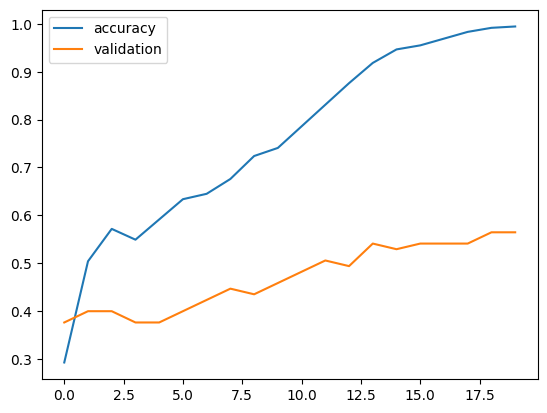

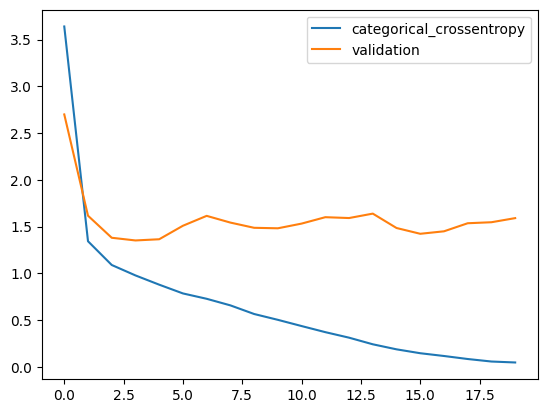

In [14]:
plt.plot(history.history["acc"],label="accuracy")
plt.plot(history.history["val_acc"],label="validation")
plt.legend()
plt.show()

plt.plot(history.history["loss"],label="categorical_crossentropy")
plt.plot(history.history["val_loss"],label="validation")
plt.legend()
plt.show()

In [15]:
print(train_generator)